# II. Reconnaissance de chiffres manuscrits

[]

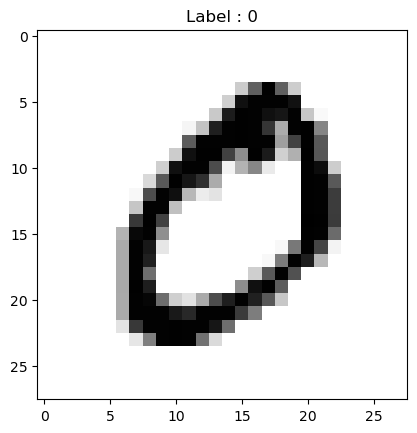

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
## if local file mnist-original.mat exist

'''
from scipy.io import loadmat

mnist = loadmat('mnist-original.mat')
mnist = mnist['data'].transpose()
plt.imshow(mnist[1,:].reshape((28,28)))
'''

#otherwise download from internet
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(int)
plt.imshow(X[1,:].reshape(28,28),cmap=matplotlib.cm.binary)
plt.title("Label : {}".format(y[1]))
plt.plot()

## Découpage du jeu de données

In [9]:
X_train, y_train, X_test, y_test = X[:60000],y[:60000],X[60000:],y[60000:]

shuffle_index = np.random.permutation(60000)

X_train , y_train = X_train[shuffle_index], y_train[shuffle_index] 

## Pré-traitement : construction one-fit all

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test==5)


## Premier modèle : perceptron multicouche (20,20)

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

mlp = MLPClassifier(hidden_layer_sizes=(20,20))



mlp.fit(X_train, y_train_5)

pred = mlp.predict(X_test)
print(confusion_matrix(y_test_5,pred))

[[9075   33]
 [  53  839]]


In [ ]:
print(classification_report(y_test_5,pred))

In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train_5,cv=3, scoring='accuracy')

## Apprentissage des hyper-paramètres

In [ ]:
##
## TODO



### Convergence du modèle

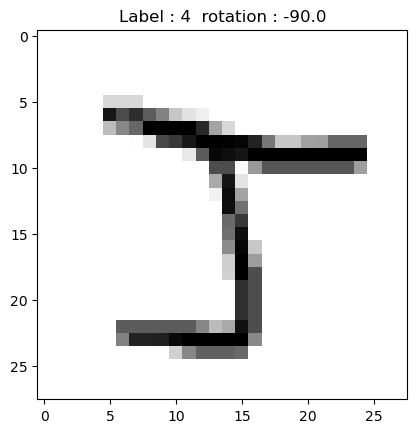

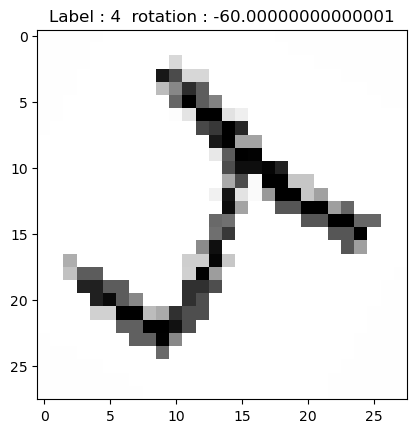

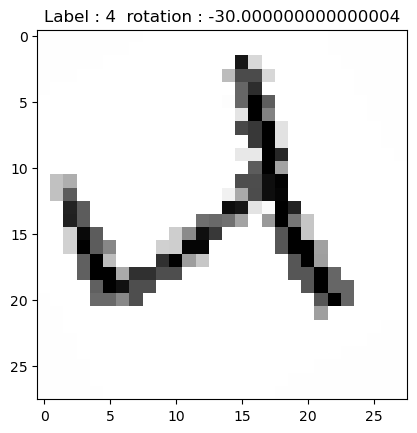

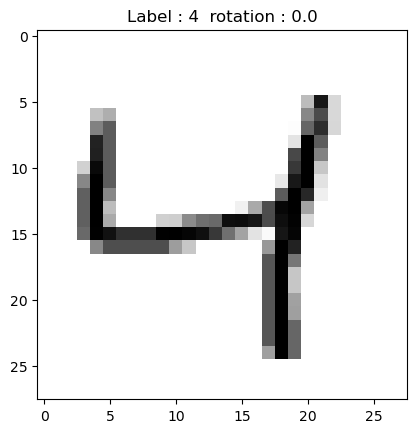

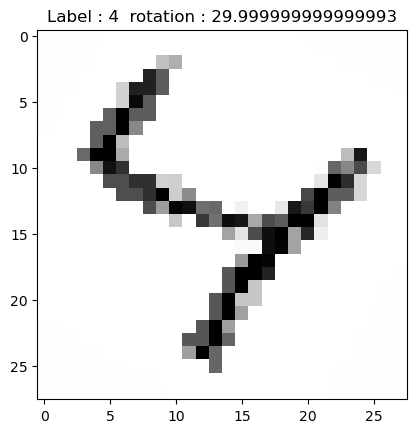

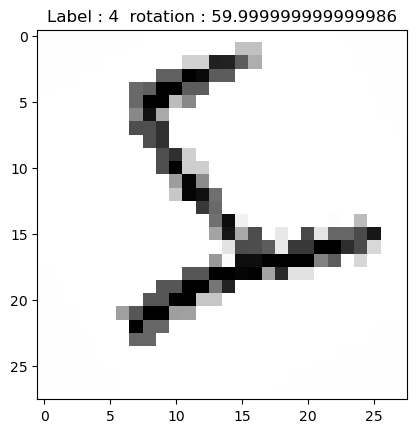

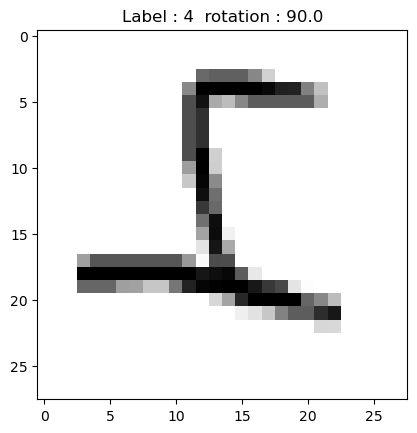

In [114]:

im_test = X[2,:]
im_test_lab = y[2]

def rotate(img, theta):
    
    rot = np.array([[np.cos(theta), -1*np.sin(theta)],[np.sin(theta),np.cos(theta)]]) # rotation matrix
    
    new_img = np.ones((28,28))
    img = img.reshape((28,28)) # in case img is not shaped correctly

    # for each cell/pixel in new image calculate the rotated coordinate and assign pixel value to the one of the corresponding rotated cell
    for i in range(28):
        for j in range(28):
            new_coord = rot @ np.array([[j-13.5],[13.5-i]]) # change coordinate in (x,y) space, reproject with a rotation of theta angle
            new_coord = np.ceil(new_coord * np.array([[1],[-1]]) + np.array([[13.5],[13.5]])) # change back (x,y) -> to cell coordinate (j,i)
            
            if np.all(new_coord< np.array([[28],[28]])) & np.all(new_coord >= np.array([[0],[0]])): # check if new coordinate is within bounds to prevent errors
                new_img[i,j] = img[int(new_coord[1,0]),int(new_coord[0,0])] # assign (i,j) to (j',i') (note coordinate is inverted on purpose)
    return new_img


for deg in np.linspace(-np.pi/2,np.pi/2,7):
    plt.figure()
    plt.imshow(rotate(im_test,deg),cmap=matplotlib.cm.binary)
    #plt.plot(np.linspace(0,2*np.pi,100), [np.cos(i) for i in np.linspace(0,2*np.pi,100)])
    plt.title("Label : {}  rotation : {}".format(im_test_lab,deg*180/np.pi))

